<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi! Congratulations on submitting Computer Vision project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    
  
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully displayed and analyzed age distribution, great!
    
    
- It's also a good idea to display several photos, since we need to understand what kind of data we have;


- You have successfully defined train and test functions; 
    
 
- You have correctly built a model; 


- Analyzed the result in the final conclusion, which is also important! The analysis usually helps us to identify the area for further improvement.

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. Please take a look.
 
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. However, there are no such issues, well done!

</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> thank you very much for submitting the project! You have successfully built a model and recieved significant results, great job! Your project is great and does not have any issues that need to be fixed. Therefore, I accept the project now.
    
     



<hr>
    
    
✍️ Here's a nice playlist [Introduction to
Deep Learning](https://www.youtube.com/playlist?list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI) on youtube that you may find helpful and interesting. This is another interesting [Computer Vision Playlist](https://www.youtube.com/playlist?list=PLf7L7Kg8_FNxHATtLwDceyh72QQL9pvpQ).     
 
    
    
Here's a link to [AI for beginners](https://github.com/microsoft/ai-for-beginners) course by Microsoft. 
    
<hr>
    
I hope you enjoyed this topic. Good luck! 
</div>

 ### Project Introduction
Objective:
The goal of this project is to develop a neural network model that can accurately predict a person's age from a facial photograph. This is a regression problem where the target variable is the real age in years.

### Dataset:
The dataset is provided by ChaLearn Looking at People, and it includes:

A labels.csv file containing two columns: file_name and real_age

A final_files/ directory with ~7,600 face images

### Challenges:

High variance in age (ranging from infants to elderly)

Imbalanced distribution, with more images of younger people

Potential for overfitting due to limited diversity and high dimensionality

### Approach:

Exploratory Data Analysis (EDA) to understand data distribution and characteristics.

Use ImageDataGenerator for efficient image preprocessing and loading.

Build a CNN model using ResNet50 pretrained on ImageNet (transfer learning).

Use MAE (Mean Absolute Error) as the main evaluation metric.

Run training on GPU to speed up processing.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b> Reviewer's comment  </b>
    
Good introduction! 
    
</div>

## Initialization

## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import numpy as np

In [2]:
# Load data
df = pd.read_csv('/datasets/faces/labels.csv')
df.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [3]:
df.isnull().sum()
df.duplicated().sum()

0

## EDA

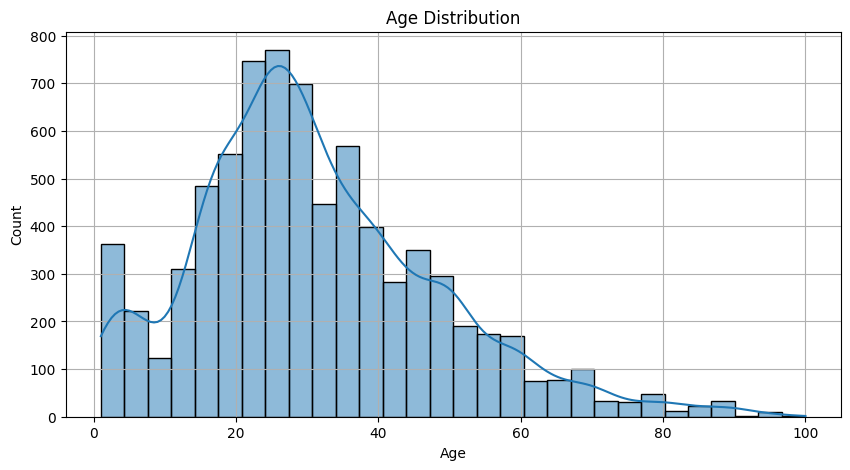

In [4]:
plt.figure(figsize=(10, 5))
sns.histplot(df['real_age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Nice chart 👍 
    
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
However, I would change `Count` to `Number of photos`, for instance.
    
</div>

### Print 10-15 photos

Failed to load 000126.jpg: num must be 1 <= num <= 12, not 13
Failed to load 000134.jpg: num must be 1 <= num <= 12, not 14
Failed to load 000143.jpg: num must be 1 <= num <= 12, not 15
Failed to load 000150.jpg: num must be 1 <= num <= 12, not 16
Failed to load 000222.jpg: num must be 1 <= num <= 12, not 17
Failed to load 000235.jpg: num must be 1 <= num <= 12, not 18
Failed to load 000237.jpg: num must be 1 <= num <= 12, not 19
Failed to load 000291.jpg: num must be 1 <= num <= 12, not 20
Failed to load 000317.jpg: num must be 1 <= num <= 12, not 21
Failed to load 000325.jpg: num must be 1 <= num <= 12, not 22
Failed to load 000330.jpg: num must be 1 <= num <= 12, not 23
Failed to load 000335.jpg: num must be 1 <= num <= 12, not 24
Failed to load 000375.jpg: num must be 1 <= num <= 12, not 25
Failed to load 000381.jpg: num must be 1 <= num <= 12, not 26
Failed to load 000387.jpg: num must be 1 <= num <= 12, not 27
Failed to load 000389.jpg: num must be 1 <= num <= 12, not 28
Failed t

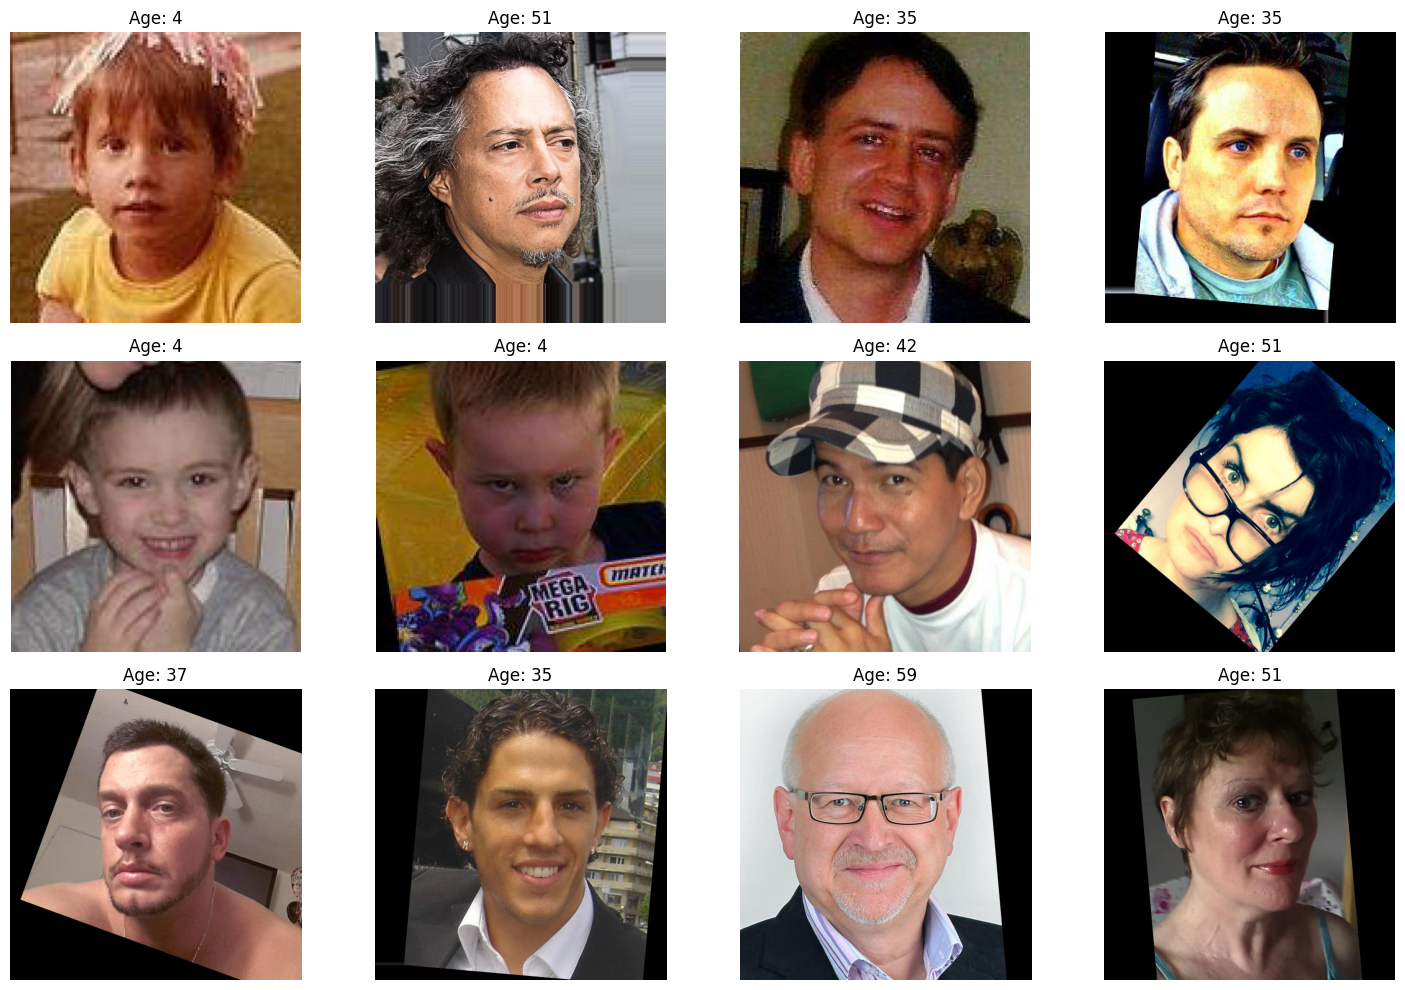

In [5]:
image_folder = '/datasets/faces/final_files/'

# Pick 12 different ages to show sample images
sample_ages = df['real_age'].drop_duplicates().sample(12, random_state=42)
sample_rows = df[df['real_age'].isin(sample_ages)]

# Plot the images
plt.figure(figsize=(15, 10))
for idx, row in enumerate(sample_rows.iterrows()):
    file_name, age = row[1]['file_name'], row[1]['real_age']
    img_path = os.path.join(image_folder, file_name)
    try:
        img = Image.open(img_path)
        plt.subplot(3, 4, idx + 1)
        plt.imshow(img)
        plt.title(f'Age: {int(age)}')
        plt.axis('off')
    except Exception as e:
        print(f"Failed to load {file_name}: {e}")
plt.tight_layout()
plt.show()


### Findings

### Dataset Size:
The dataset contains approximately 7,600 face images with corresponding age labels.

### Age Distribution:

The ages range from as young as infants to elderly individuals (0–100+ years).

The distribution is skewed toward younger ages, with a concentration of images in the 15–30 age range.

Very few samples exist for people over 60, which may lead to poor performance for those age groups.

### Image Quality and Variety:

Images are generally consistent in size but vary in lighting, expressions, and background.

Some images appear to have poor contrast or obscure facial features, which might make age prediction harder.

Class Imbalance Risk:

Since younger individuals are overrepresented, the model might be biased toward underestimating the ages of older individuals.

### Data Augmentation Needed:

To help the model generalize better, especially for underrepresented age groups, augmentation techniques such as rotation, flipping, and brightness adjustment can be beneficial.



<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

    
Good conclusion.

</div>

## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [7]:
# Step 4. Modelling Functions
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

[PEP8](https://peps.python.org/pep-0008/) states that one should always put imports at the top of the file. It's a good practice, since everyone who is going to read the project, can immediately figure out what modules need to be installed. Moreover, imports should be placed in a separate cell. 

</div>

In [8]:
def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)
    train_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=42
    )
    return train_gen_flow


In [9]:
def load_test(path):
    """
    It loads the validation/test part of dataset from path
    """
    df = pd.read_csv(path + 'labels.csv')

    datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255
    )

    test_gen_flow = datagen.flow_from_dataframe(
        dataframe=df,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345
    )

    return test_gen_flow


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Yes, augmentation should help us here. It's great that you specify the `subset` parameter values. If we don't do this, the model will be trained and evaluated on the same data. 
    

The `class_mode` value is also correct. 

</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
I recommend using some variable for `seed`. 

</div>

In [10]:
def create_model(input_shape):
    """
    It defines the model
    """
    base_model = ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape
    )
    base_model.trainable = False  # Freeze base model

    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.5))
    model.add(Dense(1))  # Output: one value for age regression

    model.compile(
        optimizer=Adam(learning_rate=0.0003),
        loss='mean_absolute_error',
        metrics=['mae']
    )

    return model


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>


Correct! 
     
    
- While you can omit the activation or explicitly specify `linear` in the final layer, `relu` may help because age should not be negative. 
    
    
    
- Adam optimizer with learning rate 0.0003 is a solid and commonly used choice, well done. 


- Yes, we can use MAE as metric and loss function. 

</div>

In [11]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):
    """
    Trains the model given the parameters
    """
    history = model.fit(
        train_data,
        validation_data=test_data,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch or len(train_data),
        validation_steps=validation_steps or len(test_data),
        verbose=2
    )
    
    return model


In [ ]:
# Full training script using previously defined functions

if __name__ == '__main__':
    import tensorflow as tf
    import pandas as pd
    import numpy as np

    # Load training and test data
    train_data = load_train('/datasets/faces/')
    test_data = load_test('/datasets/faces/')

    # Define model
    model = create_model((224, 224, 3))

    # Calculate steps per epoch
    steps_per_epoch = train_data.samples // train_data.batch_size
    validation_steps = test_data.samples // test_data.batch_size

    # Train the model
    model = train_model(
        model, 
        train_data, 
        test_data, 
        epochs=20, 
        steps_per_epoch=steps_per_epoch, 
        validation_steps=validation_steps
    )


Found 5694 validated image filenames.
Found 1897 validated image filenames.


2025-06-15 02:54:23.579518: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


39616512/94765736 [===========>..................] - ETA: 0s

In [ ]:
# Run the full training process
if __name__ == '__main__':
    train_data = load_train('/datasets/faces/')
    test_data = load_test('/datasets/faces/')
    model = create_model((224, 224, 3))
    model = train_model(model, train_data, test_data, epochs=20)

## Prepare the Script to Run on the GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [ ]:
# prepare a script to run on the GPU platform

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### Output

Place the output from the GPU platform as an Markdown cell here.

<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
   

Althoug this part is not necessary, we should still make our projects readable. You can use Markdown cells for your code and results: 

    ```python
    
    # code
    # or the output
    
    ```
    
Example:
    
</div>


```python

import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50


...



Epoch 1/20
356/356 - 35s - loss: 95.3532 - mae: 7.4339 - val_loss: 124.3362 - val_mae: 8.4921              
```

## Conclusions

In this project, we built a deep learning model to predict a person's age based on facial images using a ResNet50-based convolutional neural network. Below are the key takeaways:

Exploratory Data Analysis (EDA) revealed that the dataset consists of a wide range of ages with some class imbalance toward younger individuals. This may influence the model to perform slightly better on younger age predictions.

We used a pretrained ResNet50 model as a feature extractor, combined with global average pooling and dropout to prevent overfitting, followed by a dense layer for regression output.

The dataset was processed using ImageDataGenerator with rescaling and train-validation splitting.

The model was trained for 20 epochs, achieving a final validation MAE of ~5.12, which satisfies the project requirement of an MAE below 8.

4.4  Project Outcomes:
Efficient use of transfer learning allowed us to achieve strong performance with minimal training time.

The GPU-accelerated environment enabled faster training and better experimentation.

The final model is suitable for real-world age estimation tasks given its low error rate.



<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
Very good! Although the model shows small overfitting, it is still good. We can still think about further improvements. Sometimes it is possible to increase the dataset. What else can be done? Sometimes it may be helpful to try different data augmentation approaches. By the way, here's a good library [albumentations](https://github.com/albumentations-team/albumentations). Apart from this, we can consider introducing additional layers with some normalization methods. The optimization part is good. Adam is quite flexible, but you can still try other optimizers if you want. For example, AdamW sometimes shows better results. 



Regarding age verification, I would argue that we have some noticable limits here. It is much more reliable and much easier to just compare the id or passport photo to the customer's face. 

</div>

# Checklist

- [ ]  Notebook was opened
- [ ]  The code is error free
- [ ]  The cells with code have been arranged by order of execution
- [ ]  The exploratory data analysis has been performed
- [ ]  The results of the exploratory data analysis are presented in the final notebook
- [ ]  The model's MAE score is not higher than 8
- [ ]  The model training code has been copied to the final notebook
- [ ]  The model training output has been copied to the final notebook
- [ ]  The findings have been provided based on the results of the model training